## Testing Eval_data Correlation

Does filtering out the bad annotators + using Linear/Non-Linear models to explore metric relations better increase the Pearson Correlation between human labeling and the various metrics used for Semantic Similarity?

In [13]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

PATH_ROOT =Path(os.getcwd()).parents[0].resolve()
%cd {PATH_ROOT}

/home/shaul/workspace/GitHub/SOTA


In [46]:
import pandas as pd
import sys
import numpy as np
from src import model_corr
from src import metric_exploration

In [5]:
PATH_DATA = Path(os.getcwd()).resolve() / 'data'
PATH_COMBINED = PATH_DATA / 'full_DS' / 'full_metrics.csv'
PATH_STS = PATH_DATA / 'eval_data' / 'sts.csv'
PATH_QQP = PATH_DATA / 'eval_data'/ 'qqp.csv'

In [6]:
metrics = ['bleu', 
           'bleu1',
           'glove_cosine',
           'fasttext_cosine',
           'BertScore',
           'chrfScore',
           'POS Dist score',
           '1-gram_overlap',
           'ROUGE-1',
           'ROUGE-2',
           'ROUGE-l',
           'L2_score',
           'WMD']

### Getting the Train/Test Data

In [57]:
X_train, X_test, y_train, y_test = model_corr.get_train_test_data(train_path = PATH_COMBINED,test_path = PATH_STS, all_metrics=metrics)

Still missing the following metrics: {'WMD'}
Size of train_data: 38313	Size of test_data: 8623


### Running the baseline metric of the test dataset

In [58]:
#Applied absolute value - because even a high negative correlation is still a high correlation
X_test.corrwith(y_test).apply(lambda x: abs(x)).sort_values(ascending=False).reset_index().rename(columns={'index':'metric','0':'Metric Correlation'}).iloc[0]

metric    BertScore
0          0.546037
Name: 0, dtype: object

### Checking the correlation after Linear Model (RF)

In [82]:
model_corr.RF_corr(X_train,X_test,y_train,y_test)

0.4583843247320974

## Checking the correlation after the Non-linear Model (MLP)

(0.013983644999829029, 0.19415059232236448)

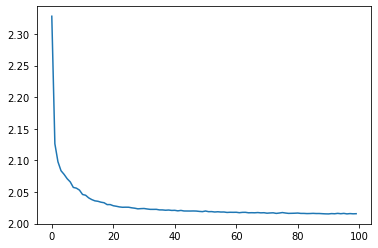

In [107]:
model_corr.MLP_corr(X_train,X_test,y_train,y_test, num_hl=64, batch_size = 64, num_epochs=100, lr=1e-4)

## No mans land

In [44]:
X_test[X_test.glove_cosine.isna()].index

,bleu,bleu1,L2_score,BertScore,chrfScore,1-gram_overlap,ROUGE-1,ROUGE-2,ROUGE-l,POS Dist score,glove_cosine,fasttext_cosine
4923,0.000000e+00,0.000000,15.499923,0.891130,0.600168,0.000000,0.000000,0.000000,0.000000,-1.0,NaN,0.41177
4935,7.598357e-01,0.833333,5.734538,0.979403,0.854148,0.500000,0.833333,0.800000,0.666667,-1.0,NaN,0.06732
5138,8.388266e-155,0.400000,13.782555,0.933300,0.628259,0.285714,0.444444,0.285714,0.444444,-1.0,NaN,NaN
5222,7.598357e-01,0.833333,5.722709,0.979403,0.854148,0.500000,0.833333,0.800000,0.666667,-1.0,NaN,0.06732
5246,7.598357e-01,0.833333,5.709502,0.979403,0.809322,0.500000,0.833333,0.800000,0.666667,-1.0,NaN,0.06732
